## Bulding a Neural Network from scratch
### This notebook creates a neural network to fit a predicitve model on the MNIST dataset, using only numpy and Pandas. There is no use of any deeplearning package and the model still achieves a predicitve accuracy of 90%

##### Idea and code developed from Samson Zhang

##### Changes: Parameters better tuned to push accuracy from 85% to 90%

In [113]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [115]:
data = pd.read_csv("C:\\Users\\sofia\\Downloads\\MNIST_CSV\\mnist_train.csv")

In [116]:
data.head(5)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [131]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [133]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [135]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 6 6 ... 6 6 6] [1 5 1 ... 9 4 3]
0.07644197359277276
Iteration:  10
[6 5 6 ... 5 6 6] [1 5 1 ... 9 4 3]
0.21685113307005202
Iteration:  20
[5 5 5 ... 7 6 6] [1 5 1 ... 9 4 3]
0.3207681486126884
Iteration:  30
[5 5 5 ... 7 6 3] [1 5 1 ... 9 4 3]
0.4069391006627231
Iteration:  40
[5 5 5 ... 9 7 3] [1 5 1 ... 9 4 3]
0.5183647180460685
Iteration:  50
[1 5 1 ... 9 7 3] [1 5 1 ... 9 4 3]
0.6360446787233682
Iteration:  60
[1 5 1 ... 9 9 3] [1 5 1 ... 9 4 3]
0.7021135951456804
Iteration:  70
[1 5 1 ... 9 4 3] [1 5 1 ... 9 4 3]
0.743012593433787
Iteration:  80
[1 5 1 ... 9 4 3] [1 5 1 ... 9 4 3]
0.7711317140968491
Iteration:  90
[1 5 1 ... 9 4 3] [1 5 1 ... 9 4 3]
0.7915727385209919
Iteration:  100
[1 5 1 ... 9 4 3] [1 5 1 ... 9 4 3]
0.8065051950033051
Iteration:  110
[1 5 1 ... 9 4 3] [1 5 1 ... 9 4 3]
0.8183020051187309
Iteration:  120
[1 5 1 ... 9 4 3] [1 5 1 ... 9 4 3]
0.8278106408583197
Iteration:  130
[1 5 1 ... 9 4 3] [1 5 1 ... 9 4 3]
0.8350311022220716
Iteration:  140


In [127]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


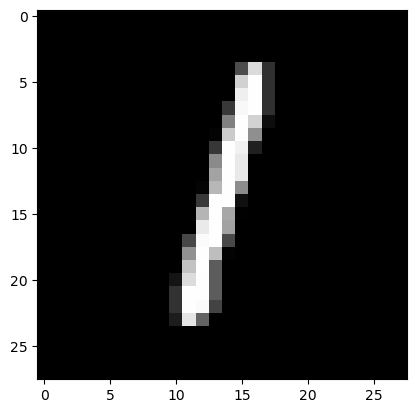

Prediction:  [5]
Label:  5


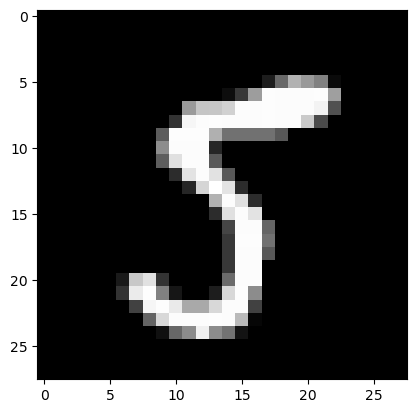

Prediction:  [1]
Label:  1


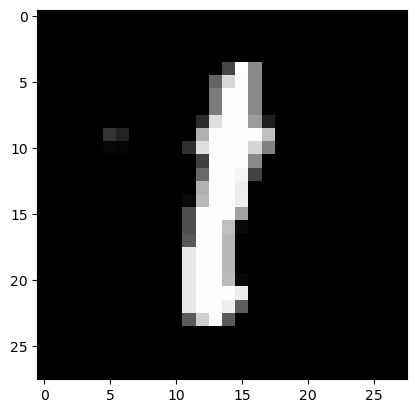

Prediction:  [3]
Label:  9


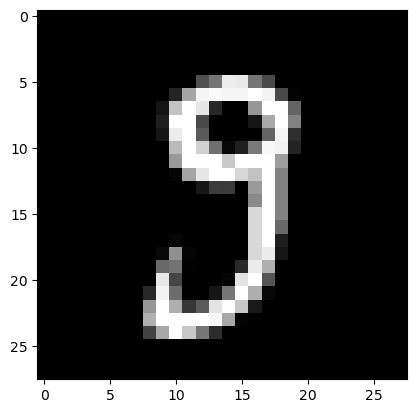

In [129]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)